In [94]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Exercise 1: Creating a Simple Visualization

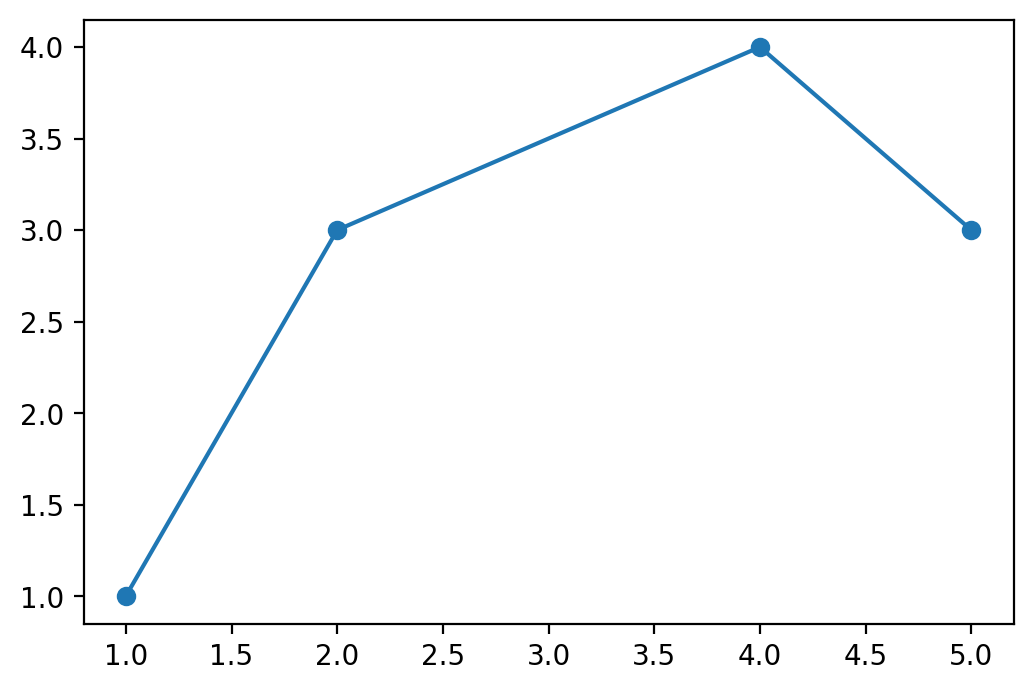

In [95]:
plt.figure(dpi=200)

plt.plot([1, 2, 4, 5], [1, 3, 4, 3], '-o')
plt.show()

In [96]:
plt.savefig('Exercise01.png',bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

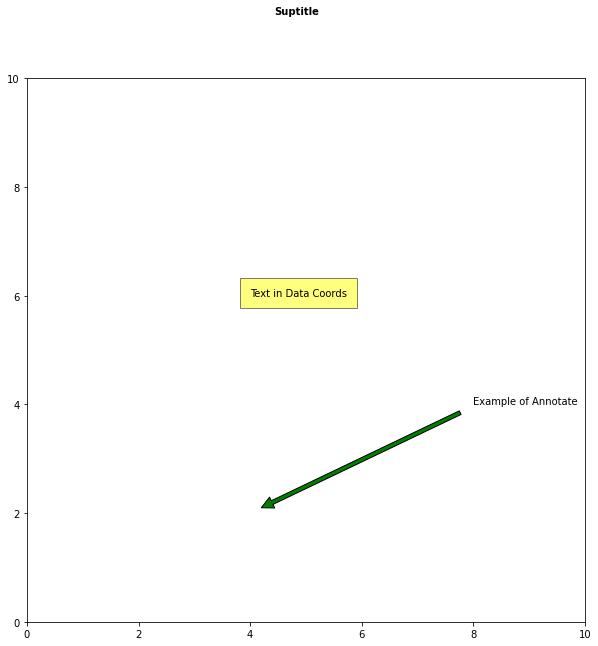

In [97]:
#ax, fig = plt.subplots()
#fig.suptitle('Suptitle', fontsize=10,fontweight='bold')
#ax.text(4, 6, 'Text in Data Coords', bbox={'facecolor': 'yellow','alpha':0.5, 'pad':10})  

fig, axes = plt.subplots(figsize=(10,10))
#labels = ['coast', 'beach','building','city at night']
fig.suptitle('Suptitle', fontsize=10,fontweight='bold')
axes.set_xlim(0,10)
axes.set_ylim(0,10)
axes.text(4, 6, 'Text in Data Coords', bbox={'facecolor': 'yellow','alpha':0.5, 'pad':10})
axes.annotate('Example of Annotate', xy=(4,2),xytext=(8,4), arrowprops=dict(facecolor='green', shrink=0.05))
plt.show()


# Exercise 2: Visualizing Stock Trends by Using a Line Plot

In [98]:
import pandas as pd

In [99]:
apple = pd.read_csv('AAPL_data.csv')
microsoft = pd.read_csv('MSFT_data.csv')
facebook = pd.read_csv('FB_data.csv')
google = pd.read_csv('GOOGL_data.csv')
amazon = pd.read_csv('AMZN_data.csv')


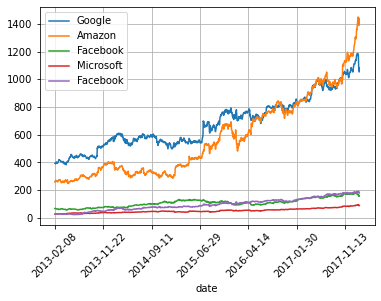

In [100]:
ax = google.plot('date','close',label='Google')
ax = amazon.plot('date','close',label='Amazon', ax = ax)
ax = apple.plot('date','close',label='Facebook', ax = ax)
ax = microsoft.plot('date','close',label='Microsoft', ax = ax)
facebook.plot('date','close',label='Facebook', ax = ax)

ax.set_xticklabels(labels = ax.get_xticklabels(),rotation =45)
plt.grid()
plt.show()


In [101]:
google.date.to_numpy()[::100].__len__()

13

# Exercise 3: Creating a Bar Plot for Movie Comparison

In [102]:
movie = pd.read_csv('movie_scores.csv')
mov = movie.drop(['Unnamed: 0'], axis = 1)
mov

,MovieTitle,Tomatometer,AudienceScore
0,The Shape of Water,91,73
1,Black Panther,97,79
2,Dunkirk,92,81
3,The Martian,91,91
4,The Hobbit: An Unexpected Journey,64,83


In [103]:
from matplotlib.ticker import MultipleLocator

ml = MultipleLocator(5)


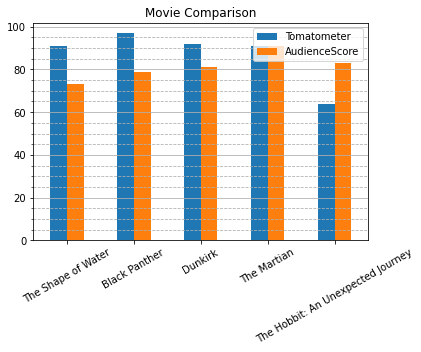

In [104]:
ax = mov.plot.bar() 
ax.set_xticklabels(labels = mov.MovieTitle.to_numpy(), rotation = 30)

ax.yaxis.set_minor_locator(ml)
ax.yaxis.grid(which='major')
ax.yaxis.grid(which='minor',linestyle='--')

ax.set_title('Movie Comparison')
plt.show()

# Exercise 04: Creating a Pie Chart for Water Usage 

In [105]:
water = pd.read_csv('water_usage.csv')

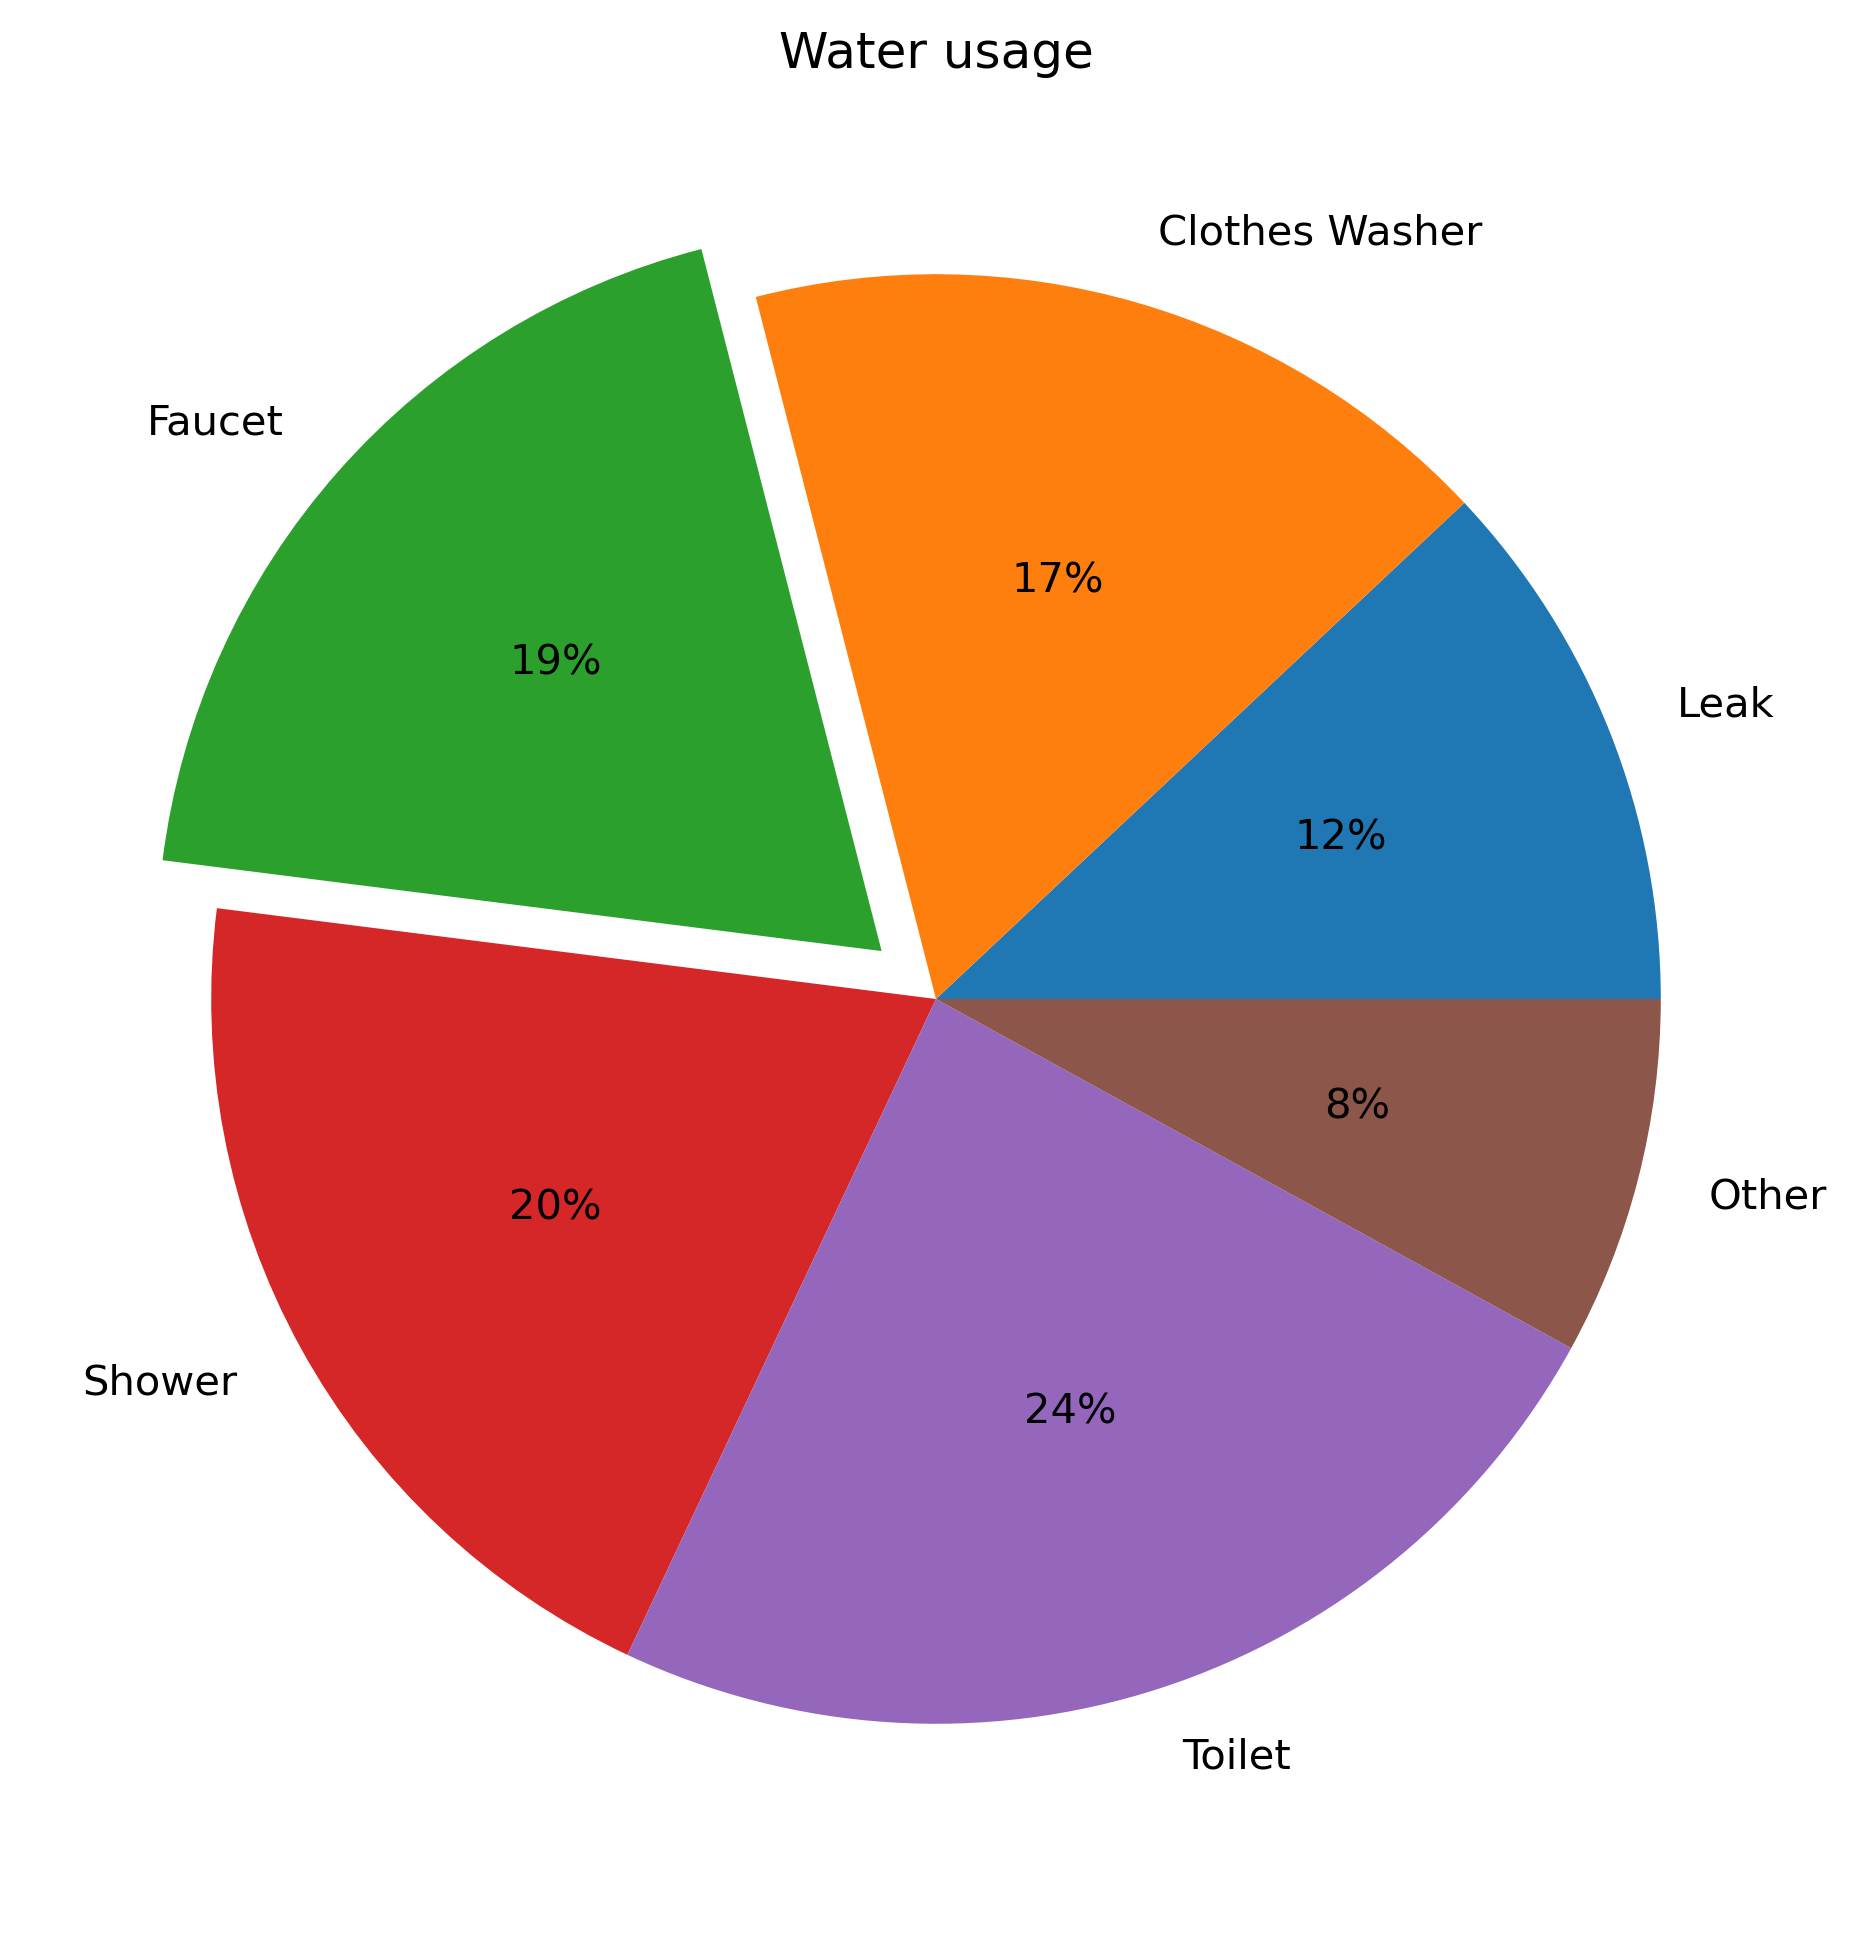

In [106]:
# Create figure
plt.figure(figsize=(8, 8), dpi=300)


# Create pie plot
plt.pie('Percentage', explode=(0, 0,
0.1, 0, 0, 0), \
labels='Usage', data=water,
autopct='%.0f%%')


# Add title
plt.title('Water usage')


# Show plot
plt.show()

# Exercise 5: Creating a Stacked Bar Plot to Visualize Restaurant Performance

In [107]:
import seaborn as sns
import matplotlib.patches as mpatches
tips = sns.load_dataset('tips')

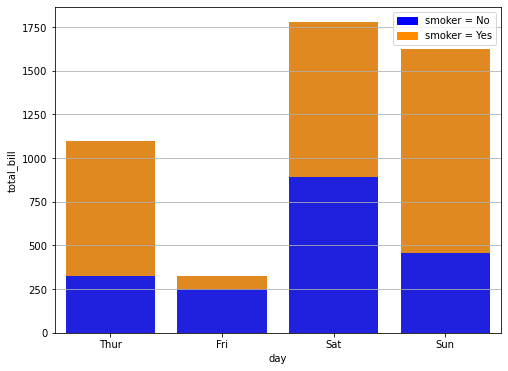

In [108]:
from shutil import which


plt.figure(figsize=(8, 6))

# top bar -> sum all values(smoker=No and smoker=Yes) to find y position of the bars
total = tips.groupby('day')['total_bill'].sum().reset_index()

# bar chart 1 -> top bars (group of 'smoker=No')
bar1 = sns.barplot(x="day",  y="total_bill", data=total, color='darkorange')

# bottom bar ->  take only smoker=Yes values from the data
smoker = tips[tips.smoker=='Yes']

# bar chart 2 -> bottom bars (group of 'smoker=Yes')
bar2 = sns.barplot(x="day", y="total_bill", data=smoker, estimator=sum, ci=None,  color='blue')

# add legend
top_bar = mpatches.Patch(color='blue', label='smoker = No')
bottom_bar = mpatches.Patch(color='darkorange', label='smoker = Yes')
plt.legend(handles=[top_bar, bottom_bar])
plt.grid(axis = 'y')

# show the graph
plt.show()

# Exercise 06: Comparing Smartphone Sales Units Using a Stacked Area Chart

In [109]:
smart = pd.read_csv('smartphone_sales.csv')
st = smart.drop(['Unnamed: 0'], axis = 1)
st

,Quarter,Apple,Samsung,Huawei,Xiaomi,OPPO
0,3Q16,43001,71734,32490,14926,24591
1,4Q16,77039,76783,40804,15751,26705
2,1Q17,51993,78776,34181,12707,30922
3,2Q17,44315,82855,35964,21179,26093
4,3Q17,45442,85605,36502,26853,29449
5,4Q17,73175,74027,43887,28188,25660
6,1Q18,54059,78565,40426,28498,28173
7,2Q18,44715,72336,49847,32826,28511


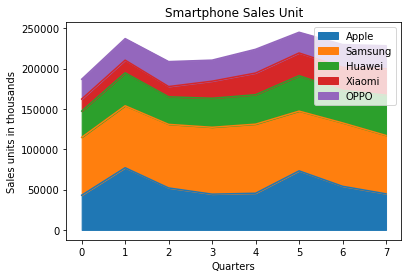

In [110]:
ax = st.plot.area()
ax.set_title('Smartphone Sales Unit')
ax.set_xlabel('Quarters')
ax.set_ylabel('Sales units in thousands')
ax.legend(loc='upper right')
plt.show()

# Exercise 07: Using a Histogram and a Box Plot to Visualize Intelligence Quotient

In [111]:
iq_d = pd.read_csv('iq_scores.csv')
iq_d

,group_a,group_b,group_c,group_d
0,118,126,108,93
1,103,89,89,99
2,125,90,114,91
3,107,101,116,110
4,111,102,126,80
...,...,...,...,...
95,88,91,102,105
96,122,112,69,74
97,125,102,96,85
98,93,112,101,85


In [112]:
iq_scores = [126, 89, 90, 101, 102, 74,
93, 101, 66, 120, 108, 97, 98, 105, 119,
92, 113, 81, 104, 108, 83, 102, 105,
111, 102, 107, 103, 89, 89, 110, 71, 110,
 120,85, 111, 83, 122, 120, 102, 84, 118, 100,
100, 114, 81, 109, 69, 97, 95, 106, 116, 109, 114,
98, 90, 92, 98, 91, 81, 85, 86, 102, 93,
112, 76, 89, 110, 75, 100, 90, 96, 94, 107,
108, 95, 96, 96, 114, 93, 95, 117, 141, 115,
95, 86, 100, 121, 103, 66, 99, 96, 111, 110,
105, 110, 91, 112, 102, 112, 75]

print('Mean:  ',np.mean(iq_scores))

Mean:   99.53


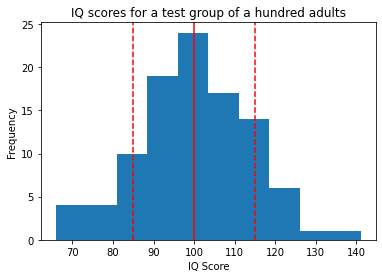

In [113]:
plt.hist(iq_scores, bins=10)
plt.axvline(100,color='red')
plt.axvline(85, color="red", linestyle="--")
plt.axvline(115, color="red", linestyle="--")


plt.xlabel('IQ Score')
plt.ylabel('Frequency')
plt.title('IQ scores for a test group of a hundred adults')

plt.show()

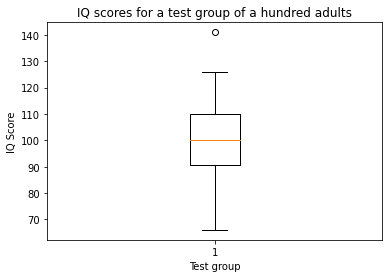

In [114]:
plt.boxplot(iq_scores)

plt.ylabel('IQ Score')
plt.xlabel('Test group')
plt.title('IQ scores for a test group of a hundred adults')

plt.show()

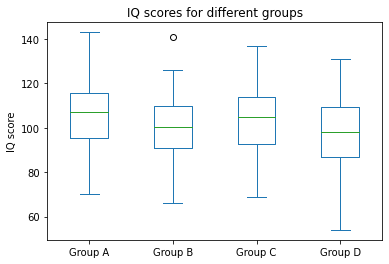

In [115]:
ax = iq_d.plot.box()

ax.set_xticklabels(labels = ['Group A','Group B',
'Group C','Group D' ])

ax.set_ylabel('IQ score')

ax.set_title('IQ scores for different groups')
plt.show()

# Exercise 08: Using a Scatter Plot to Visualize Correlation between Various Animals

In [116]:
anage = pd.read_csv('anage_data.csv')
data = anage.drop(['Unnamed: 0'], axis = 1)
data

,HAGRID,Kingdom,Phylum,Class,Order,Family,Genus,Species,Common name,Female maturity (days),...,Growth rate (1/days),Maximum longevity (yrs),Specimen origin,Sample size,Data quality,IMR (per yr),MRDT (yrs),Metabolic rate (W),Body mass (g),Temperature (K)
0,3,Animalia,Arthropoda,Branchiopoda,Diplostraca,Daphniidae,Daphnia,pulicaria,Daphnia,NaN,...,NaN,0.19,unknown,medium,acceptable,NaN,NaN,NaN,NaN,NaN
1,5,Animalia,Arthropoda,Insecta,Diptera,Drosophilidae,Drosophila,melanogaster,Fruit fly,7.0,...,NaN,0.30,captivity,large,acceptable,0.05,0.04,NaN,NaN,NaN
2,6,Animalia,Arthropoda,Insecta,Hymenoptera,Apidae,Apis,mellifera,Honey bee,NaN,...,NaN,8.00,unknown,medium,acceptable,NaN,NaN,NaN,NaN,NaN
3,8,Animalia,Arthropoda,Insecta,Hymenoptera,Formicidae,Cardiocondyla,obscurior,Cardiocondyla obscurior,NaN,...,NaN,0.50,captivity,medium,acceptable,NaN,NaN,NaN,NaN,NaN
4,9,Animalia,Arthropoda,Insecta,Hymenoptera,Formicidae,Lasius,niger,Black garden ant,NaN,...,NaN,28.00,unknown,medium,acceptable,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4213,4239,Animalia,Porifera,Hexactinellida,Lyssacinosida,Rossellidae,Scolymastra,joubini,Hexactinellid sponge,NaN,...,NaN,15000.00,wild,medium,questionable,NaN,NaN,NaN,NaN,NaN
4214,4241,Plantae,Pinophyta,Pinopsida,Pinales,Pinaceae,Pinus,longaeva,Great Basin bristlecone pine,NaN,...,NaN,5062.00,wild,medium,acceptable,NaN,999.00,NaN,NaN,NaN
4215,4242,Fungi,Ascomycota,Saccharomycetes,Saccharomycetales,Saccharomycetaceae,Saccharomyces,cerevisiae,Baker's yeast,NaN,...,NaN,0.04,captivity,large,acceptable,NaN,NaN,NaN,NaN,NaN
4216,4243,Fungi,Ascomycota,Schizosaccharomycetes,Schizosaccharomycetales,Schizosaccharomycetaceae,Schizosaccharomyces,pombe,Fission yeast,NaN,...,NaN,NaN,unknown,small,low,NaN,NaN,NaN,NaN,NaN


In [117]:
# Preprocessing
longevity = 'Maximum longevity (yrs)'
mass = 'Body mass (g)'


data = data[np.isfinite(data[longevity]) & np.isfinite(data[mass])]


# Sort according to class
amphibia = data[data['Class'] == 'Amphibia']
aves = data[data['Class'] == 'Aves']
mammalia = data[data['Class'] == 'Mammalia']
reptilia = data[data['Class'] == 'Reptilia']

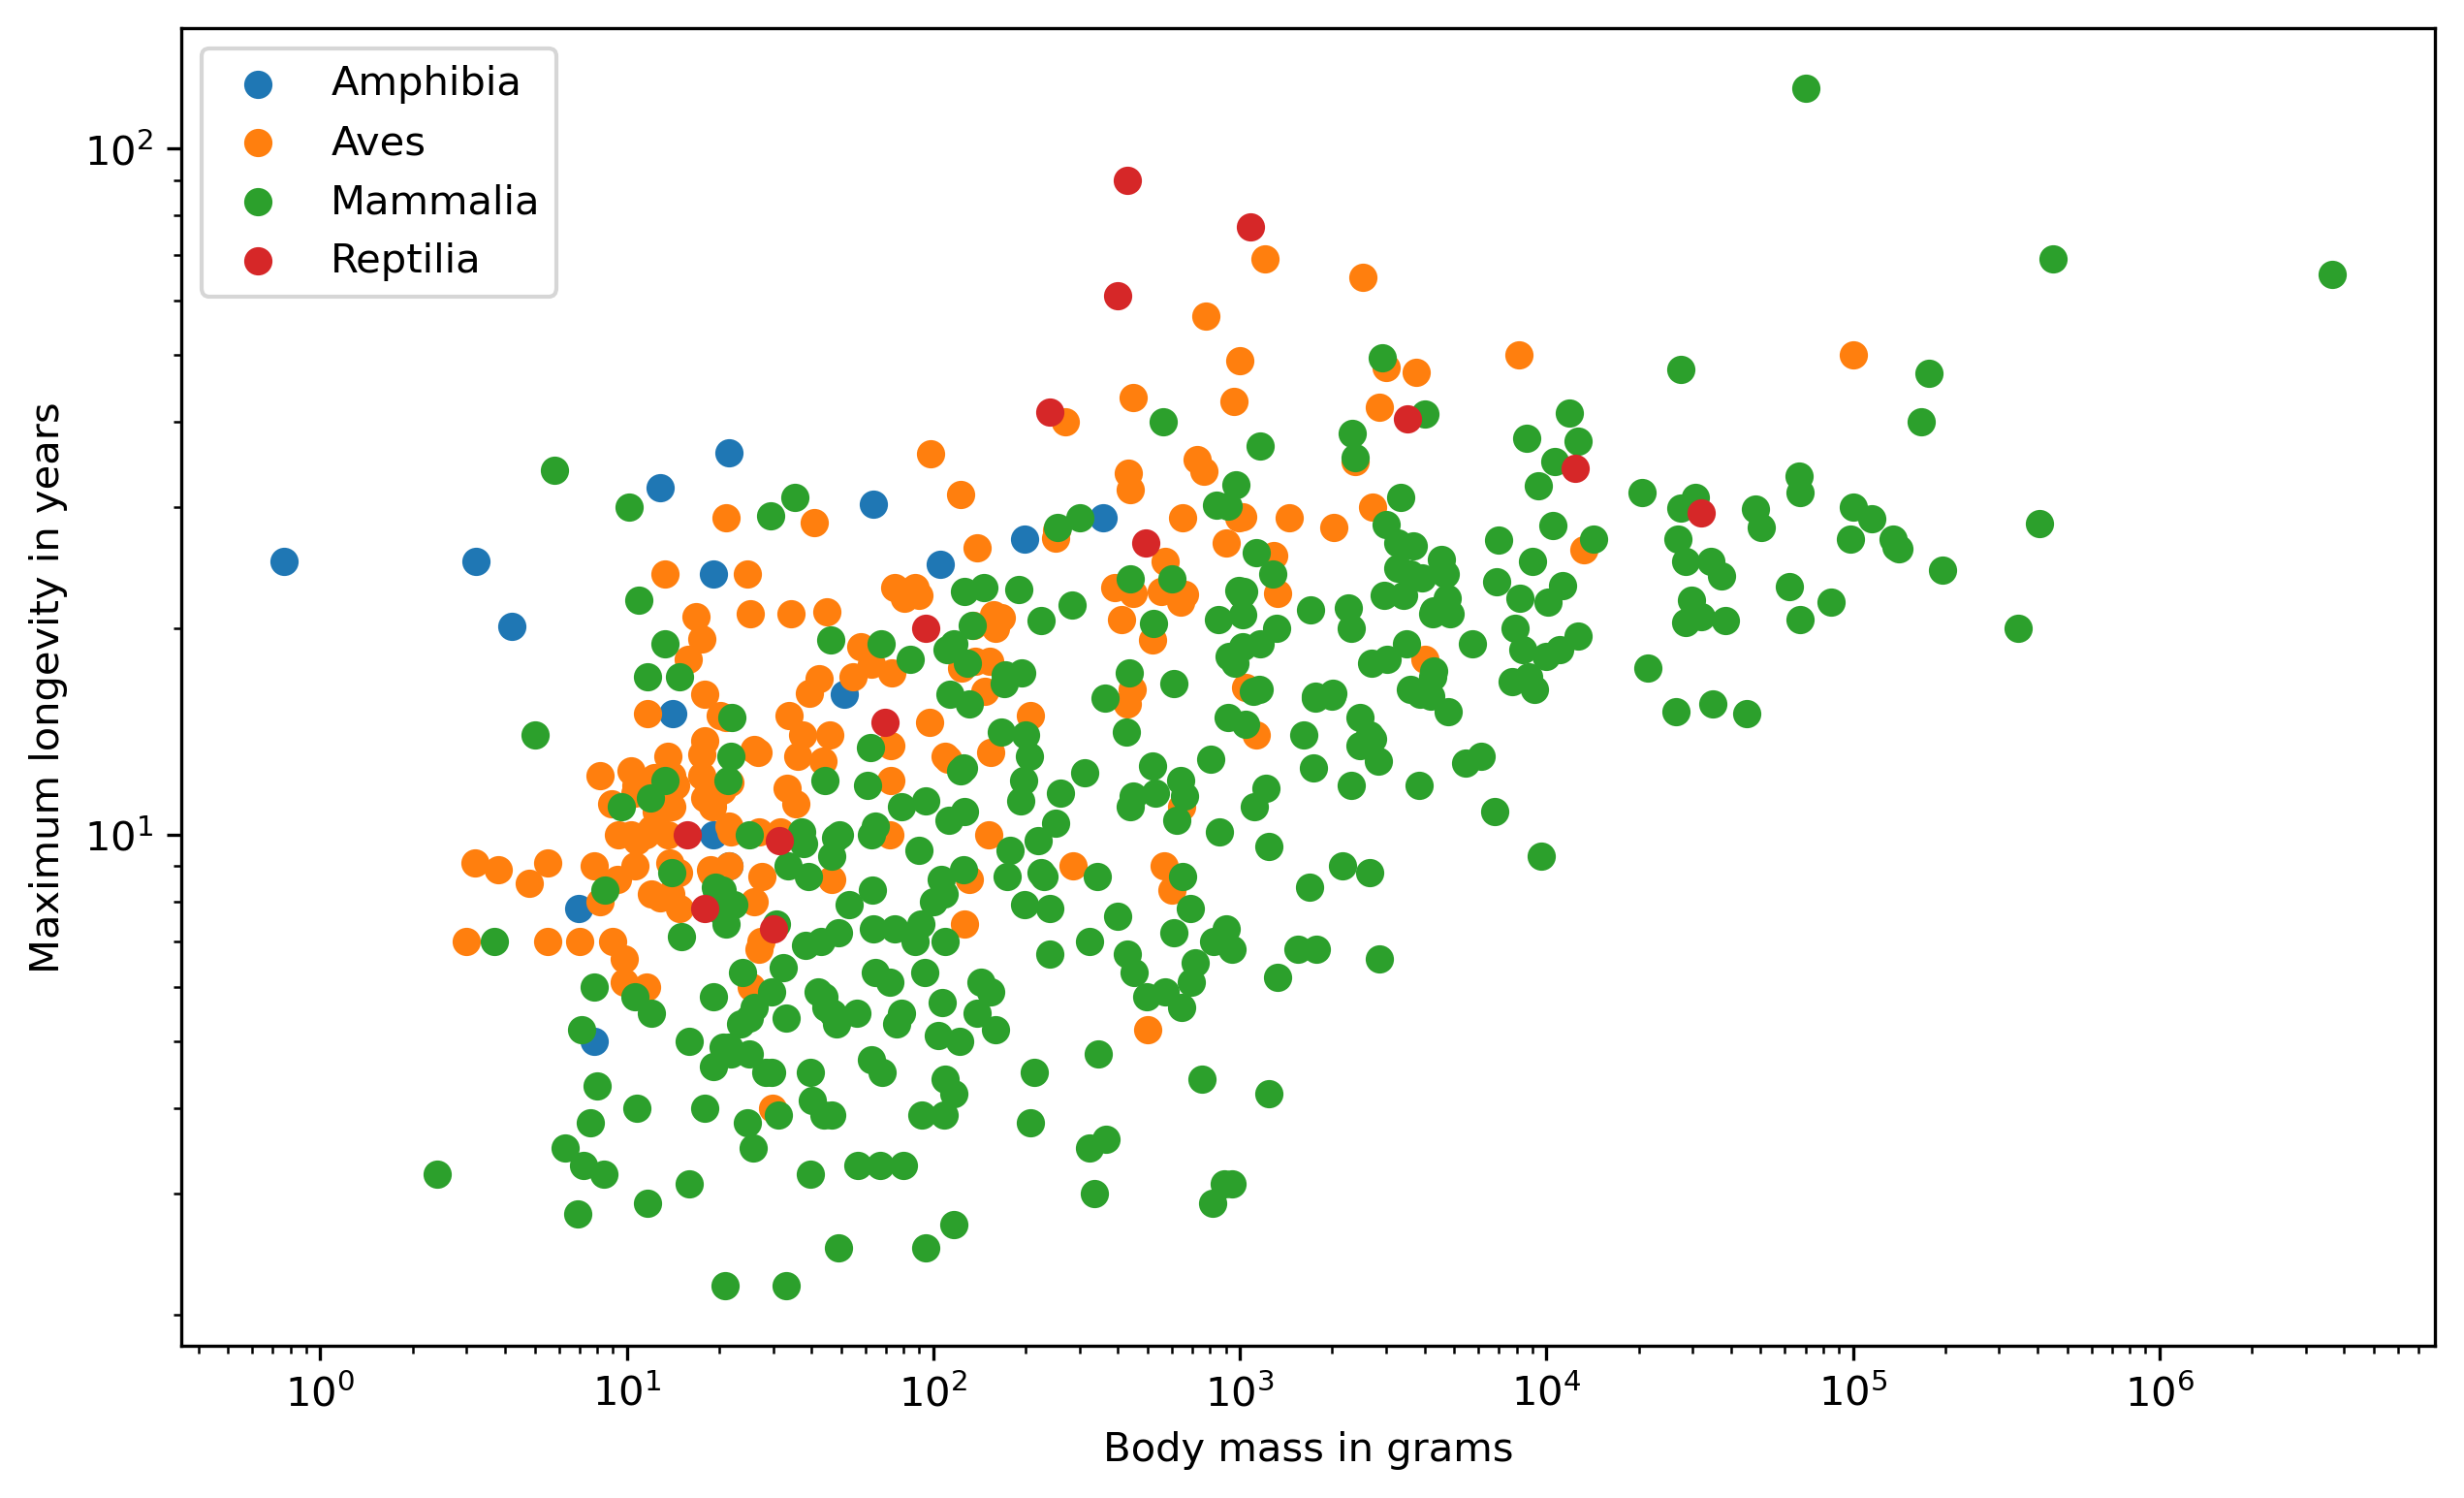

In [118]:
# Create figure
plt.figure(figsize=(10, 6), dpi=300)

# Create scatter plot
plt.scatter(amphibia[mass], amphibia[longevity], label='Amphibia')

plt.scatter(aves[mass], aves[longevity], label='Aves')
plt.scatter(mammalia[mass], mammalia[longevity], label='Mammalia')
plt.scatter(reptilia[mass], reptilia[longevity], label='Reptilia')

# Add legend
plt.legend()

# Log scale
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')

# Add labels
plt.xlabel('Body mass in grams')
plt.ylabel('Maximum longevity in years')

# Show plot
plt.show()

# Exercise 09: Working on Radar Charts

In [119]:
"""
Sample data

Attributes: Efficiency, Quality,
Commitment, Responsible Conduct,
Cooperation
"""
data = pd.DataFrame(
    {'Employee': ['Alex','Alice', 'Chris','Jennifer'], 
'Efficiency': [5, 4, 4,3,],
'Quality': [5, 5, 3, 3],
'Commitment': [5, 4, 4,4],
'Responsible Conduct': [4,4, 4, 3],
'Cooperation': [4, 3, 4,5]})

data


,Employee,Efficiency,Quality,Commitment,Responsible Conduct,Cooperation
0,Alex,5,5,5,4,4
1,Alice,4,5,4,4,3
2,Chris,4,3,4,4,4
3,Jennifer,3,3,4,3,5


In [120]:
attributes = list(data.columns[1:])
values = list(data.values[:, 1:])
employees = list(data.values[:, 0])

angles = [(n/float(5))*2*np.pi 
for n in range(len(attributes))]

# Close the plot
angles += angles[:1]
angles = angles[:5]
values = np.asarray(values)


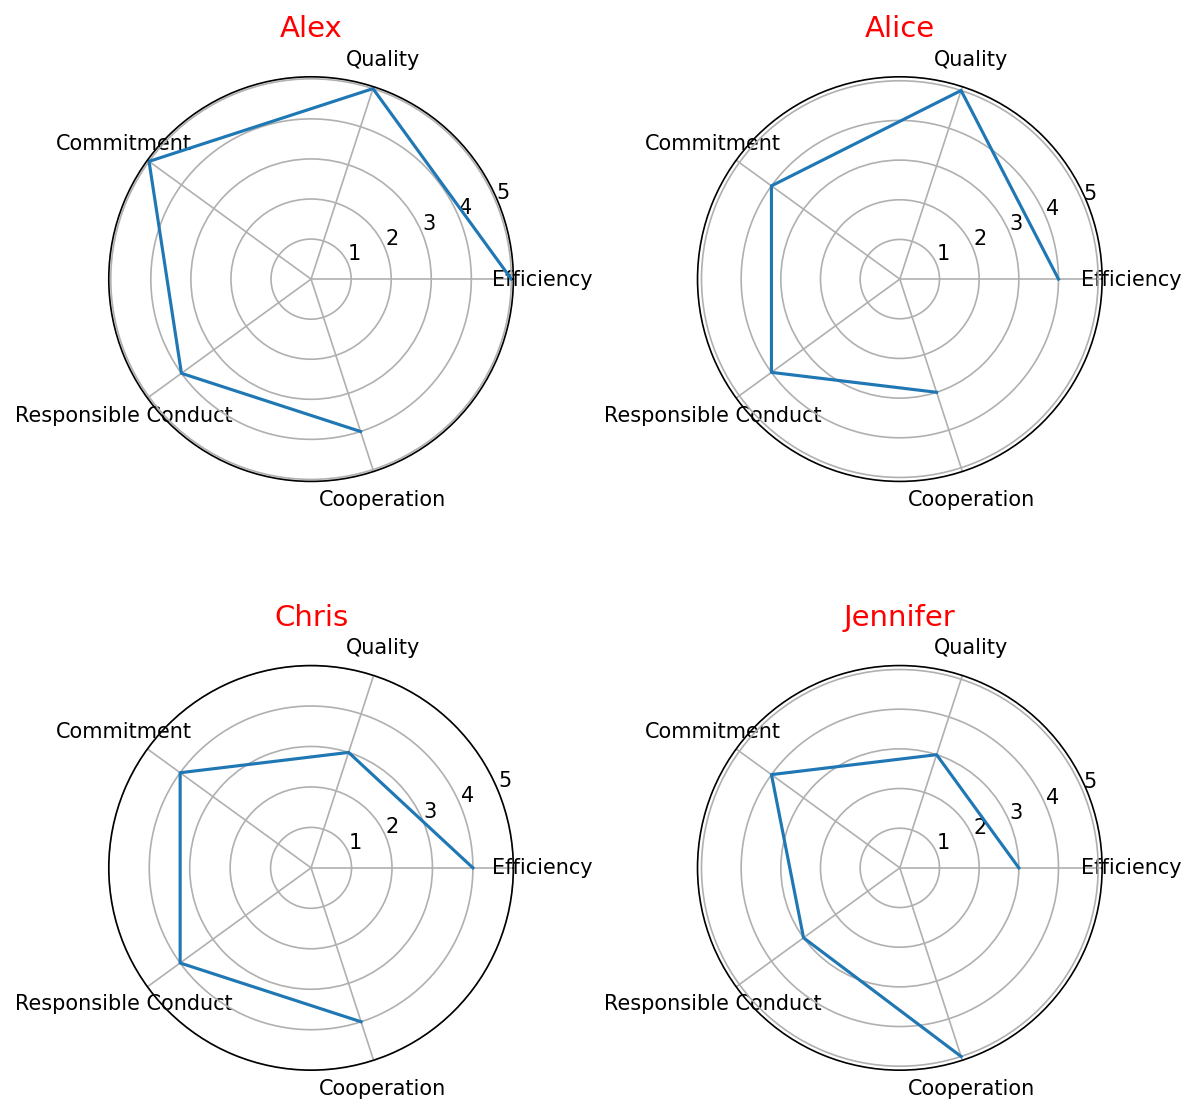

In [121]:
# Create figure
plt.figure(figsize=(8, 8), dpi=150)

# Create subplots
for i in range(4):
    ax = plt.subplot(2, 2, i + 1, polar=True)
    ax.plot(angles, values[i])
    ax.set_yticks([1, 2, 3, 4, 5])
    ax.set_xticks(angles)
    ax.set_xticklabels(attributes)
    ax.set_title(employees[i],fontsize=14, color='r')

# Set tight layout
plt.tight_layout()

# Show plot
plt.show()

# Exercise 10: Creating a Scatter Plot with Marginal Histograms

In [122]:
anage = anage.drop(['Unnamed: 0'], axis = 1) 
# then run this cell use ths


In [123]:
re = aves[aves['Body mass (g)'] < 20000]

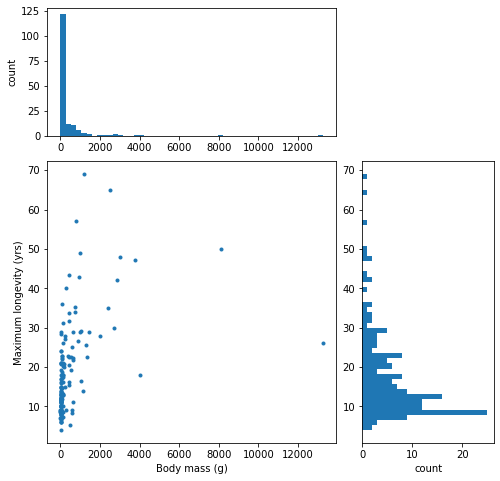

In [124]:
import matplotlib.gridspec as gridspec


fig = plt.figure(figsize=(8,8))
gs = gridspec.GridSpec(3, 3)
ax_main = plt.subplot(gs[1:3, :2])
ax_xDist = plt.subplot(gs[0, :2],sharex=ax_main)
ax_yDist = plt.subplot(gs[1:3, 2],sharey=ax_main)
    
ax_main.scatter(re[mass],re[longevity], marker='.')
ax_main.set(xlabel=mass, ylabel=longevity)

ax_xDist.hist(re[mass],bins=50,align='mid')
ax_xDist.set(ylabel='count')


ax_yDist.hist(re[longevity],bins=50,orientation='horizontal',align='mid')
ax_yDist.set(xlabel='count')

plt.show()

# Exercise 11: Plotting Multiple Images in a Grid


In [125]:
import os
import matplotlib.image as mpimg

In [126]:
img_filenames = os.listdir('D:/VS Code/images')

In [127]:
imgs = [mpimg.imread(os.path.join(
    'D:/VS Code/images', img_filename)) for img_filename

in img_filenames]


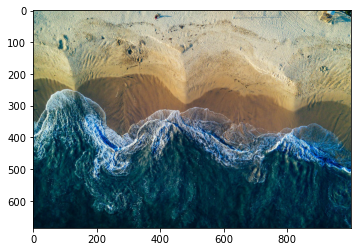

In [128]:
plt.imshow(imgs[1])

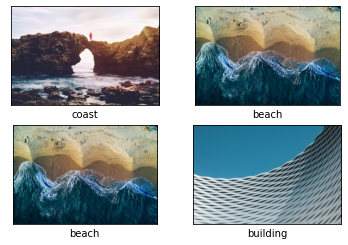

In [129]:
fig, axes = plt.subplots(2, 2)
labels = ['coast', 'beach','building','city at night']
for j in range(2):
    for i in range(2):
        axes[i,j].imshow(imgs[i+j])
        axes[i,j].set_xticks([])
        axes[i,j].set_yticks([])
        axes[i,j].set_xlabel(labels[i+j])
